In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv("C:\\Users\\User\\Downloads\\task1.csv")

# 1. Explore the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 n

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


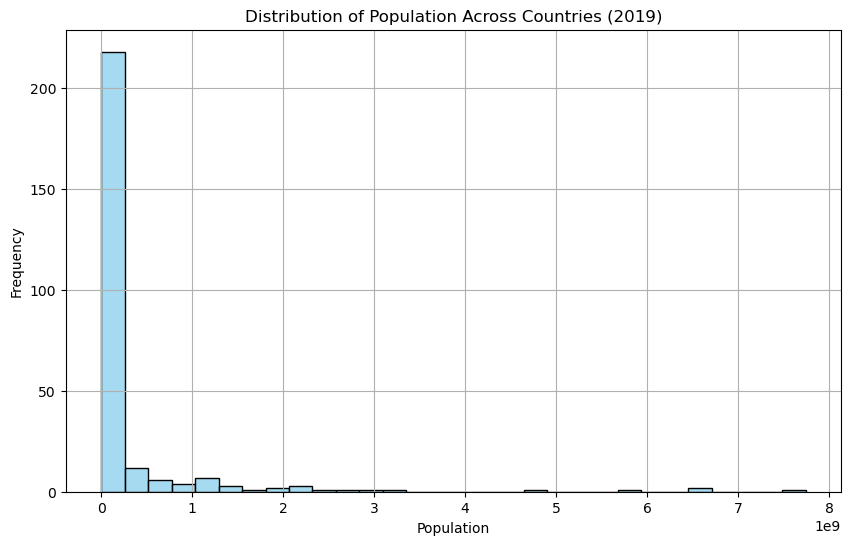

In [4]:
# 2. Visualize the distribution of population across all countries using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['2019'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Distribution of Population Across Countries (2019)')
plt.grid(True)
plt.show()

From this Barchart we can see that  the frequency is decreasing among population

In [5]:
# 3. Calculate summary statistics for the population data
summary_stats = df['2019'].describe()
print("\nSummary Statistics for Population (2019):")
print(summary_stats)


Summary Statistics for Population (2019):
count    2.650000e+02
mean     3.156701e+08
std      9.850405e+08
min      1.095600e+04
25%      1.788878e+06
50%      1.044767e+07
75%      5.987258e+07
max      7.741775e+09
Name: 2019, dtype: float64


This is the summary of statistics

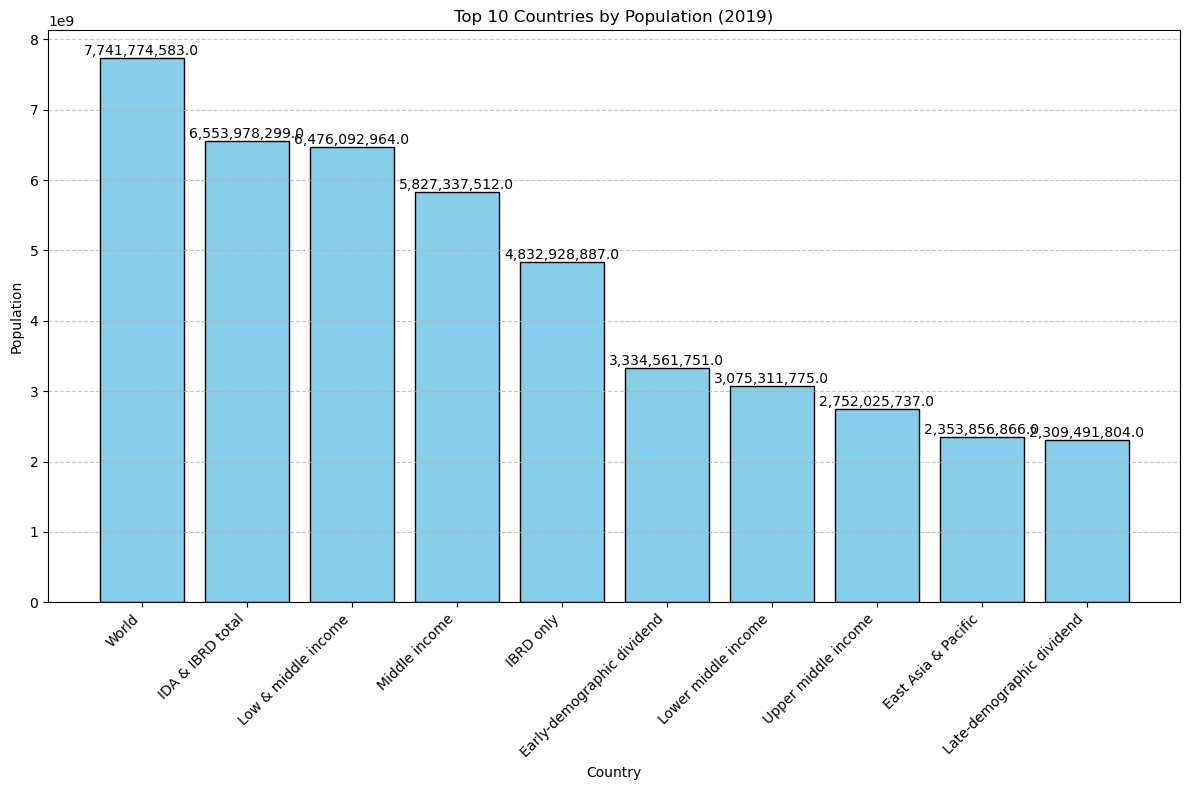

In [7]:
# 4. Create a bar chart with annotations for the top 10 countries by population
plt.figure(figsize=(12, 8))
df_top_countries = df[['Country Name', '2019']].nlargest(10, '2019')
plt.bar(df_top_countries['Country Name'], df_top_countries['2019'], color='skyblue', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 Countries by Population (2019)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add annotations
for i, value in enumerate(df_top_countries['2019']):
    plt.text(i, value, f'{value:,}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

This barchart reperesents top 10 countries by population. The bargraph showing a decreasing trend world has the highest value of 
7741774583 and Late-demographic dividend has 309491804

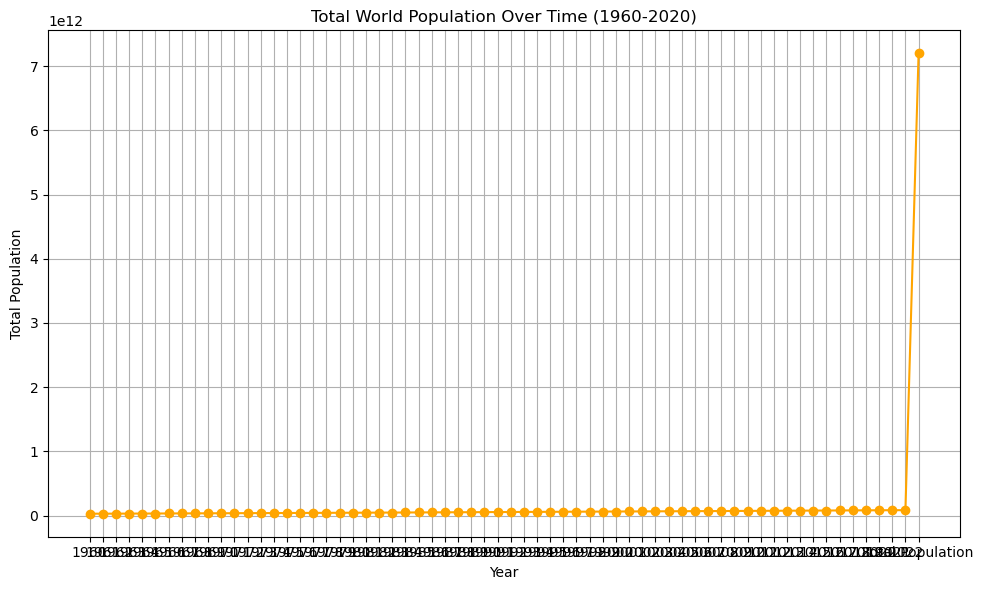

In [14]:
# Calculate the total population for each year and plot it over time
df['Total Population'] = df.iloc[:, 4:].sum(axis=1)
plt.figure(figsize=(10, 6))
years_with_data = df.columns[4:]  # Select years where population data exists
total_population = df.iloc[:, 4:].sum(axis=0)  # Calculate total population for each year
plt.plot(years_with_data, total_population, marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total World Population Over Time (1960-2020)')
plt.grid(True)
plt.tight_layout()
plt.show()




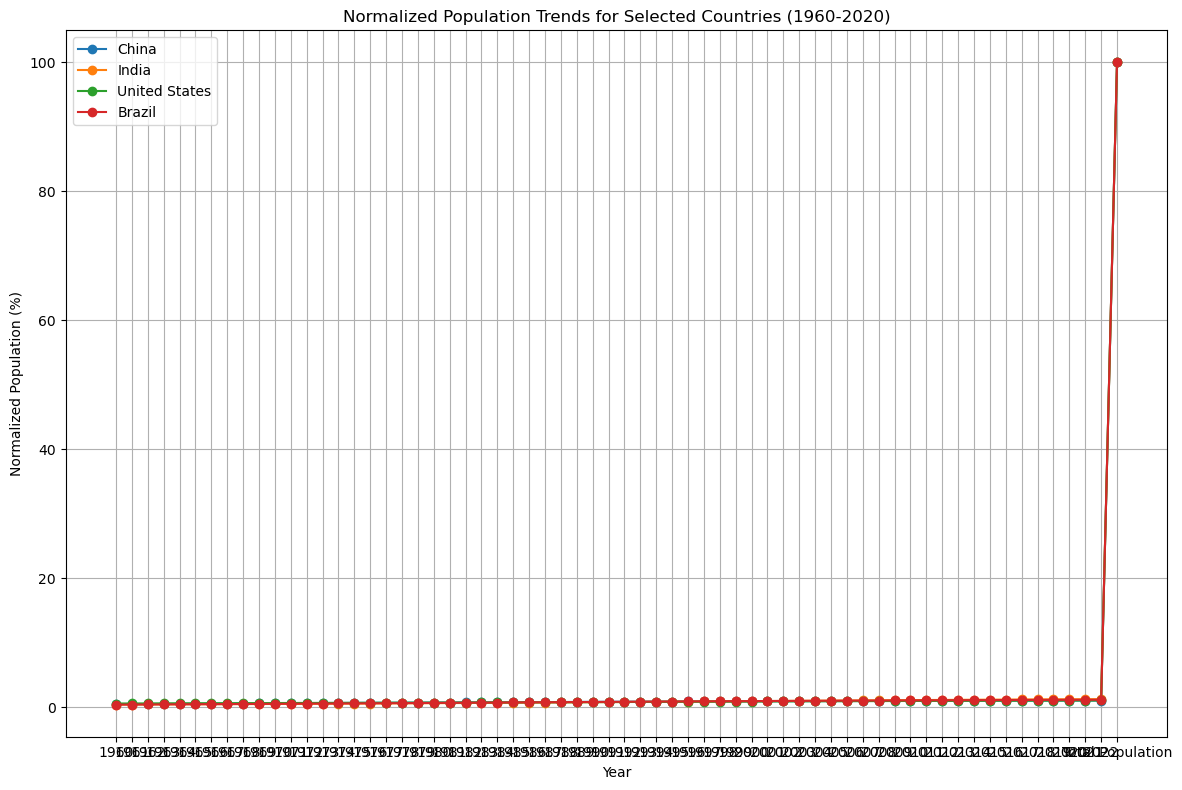

In [13]:
# 8. Normalize the population data
normalized_df = df.copy()
normalized_df['Total Population'] = normalized_df.iloc[:, 4:].sum(axis=1)
normalized_df.iloc[:, 4:] = normalized_df.iloc[:, 4:].div(normalized_df['Total Population'], axis=0) * 100

# 9. Plot normalized population trends for selected countries
plt.figure(figsize=(12, 8))
for country in selected_countries:
    country_data = normalized_df[normalized_df['Country Name'] == country]
    if not country_data.empty:  # Check if data exists for the selected country
        plt.plot(country_data.columns[4:], country_data.values.flatten()[4:], marker='o', label=country)
plt.xlabel('Year')
plt.ylabel('Normalized Population (%)')
plt.title('Normalized Population Trends for Selected Countries (1960-2020)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


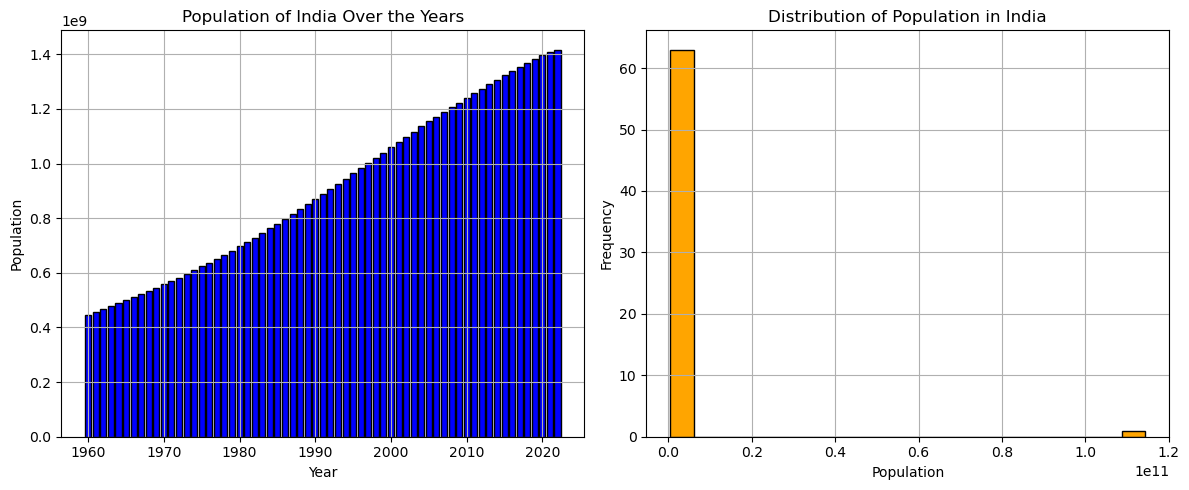

In [17]:
chosen_country = 'India'

country_data = df[df['Country Name'] == chosen_country]

numeric_columns = country_data.select_dtypes(include='number').columns
years = pd.to_numeric(numeric_columns.str.replace(r'\D+', '', regex=True))

# Extract population data for the chosen country
population = country_data[numeric_columns].values.flatten()

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for population over the years
axs[0].bar(years, population, color='blue', edgecolor='black')  # Changed bar color to blue
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Population')
axs[0].set_title(f'Population of {chosen_country} Over the Years')

# Histogram of population data
axs[1].hist(population, bins=20, color='orange', edgecolor='black')  # Changed histogram color to orange
axs[1].set_xlabel('Population')
axs[1].set_ylabel('Frequency')
axs[1].set_title(f'Distribution of Population in {chosen_country}')

# Adding grid to both subplots
axs[0].grid(True)
axs[1].grid(True)

plt.tight_layout()
plt.show()

The population over showing a hike from 1962 to 2020 from 0.4 it is increased upto 1.4